In [342]:
import pandas as pd
import regex as re

# a) Length of Narratives
#### 1. Load the data and observe the first few entries.


In [343]:
emergency = pd.read_csv("emergency.csv")
emergency.head(40)

,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED SKULL
0,75YOF WITH LAC TO FINGER FROM METAL CAN
1,8YOF FRACTURED FINGER FELL OFF HER BIKE
2,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
3,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...
4,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...
5,12YOF FELL DOWN STAIRS DX: FX RADIUS
6,50 Y FEMALE FELL IN BATHTUB AT HOME CAUSING IN...
7,21 MO MALE FELL AND HIT FACE ON WINDOW SILL. ...
8,PARAPLEGIC PT GOT BURNED ON BUTTOCK 3 WEEKS AG...
9,77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSI...


#### 2. Find the longest and shortest narratives based on the number of characters.

In [344]:
def max_length(data):
    max_length = 0
    max_row = None
    longest = None
    for i in data.index:
        current_length = len(data.loc[i].iloc[0])
        if current_length > max_length:
            max_length = current_length
            max_row = i
            longest = data.loc[i].iloc[0]
            
    return longest

In [345]:
max = max_length(emergency)
max

'40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FELT TEARING SENSATION IN F OOT AFTER WARM UP EXERCISES FOR SOCCER  DX PLANTER FASCITIS ACUTE FLARE'

In [346]:
def min_length(data):
    min_length = len(data.loc[0].iloc[0])
    min_row = None
    shortest = None
    for i in data.index:
        current_length = len(data.loc[i].iloc[0])
        if current_length < min_length:
            min_length = current_length
            min_row = i
            shortest = data.loc[i].iloc[0]
            
    return shortest

In [347]:
min = min_length(emergency)
min

'ABR HIP ON FLOOR '

#### 3. Display a portion (e.g., first 50 characters) of these narratives along with their length

In [348]:
for i in emergency.index:
    narratives = str(emergency.loc[i].iloc[0])
    length = len(narratives)
    print(f"{i}: {narratives[:50]}... (Length: {length})")

0: 75YOF WITH LAC TO FINGER FROM METAL CAN ... (Length: 40)
1: 8YOF FRACTURED FINGER FELL OFF HER BIKE ... (Length: 40)
2: 9 YOM TACKLED DURING FOOTBALL PRACTICE.  DX: CONCU... (Length: 57)
3: PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL DX: C... (Length: 52)
4: DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL & H... (Length: 100)
5: 12YOF FELL DOWN STAIRS DX: FX RADIUS... (Length: 36)
6: 50 Y FEMALE FELL IN BATHTUB AT HOME CAUSING INJ TO... (Length: 81)
7: 21 MO MALE FELL AND HIT FACE ON WINDOW SILL.  DX F... (Length: 65)
8: PARAPLEGIC PT GOT BURNED ON BUTTOCK 3 WEEKS AGO WH... (Length: 126)
9: 77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSING A... (Length: 71)
10: DX SH PN/NECK PN: 75YOF WEEDING, FEL OVER HIT HEAD... (Length: 121)
11: 28 YO F, C/O RT HAND PAIN AFTER SMASHING IT IN THE... (Length: 106)
12: 45YOF, ACC CUT LT INDEX FINGER ON A NEW KNIFE WHIL... (Length: 82)
13: 80 Y/O F TAKED INSULIN. WASHING DISHES AND BEGAN T... (Length: 92)
14: 5MOF ROLLED OFF OF PARENTS BED AND HIT HEA

# b) Fractures

#### 1. Identify all variations of the word "fracture" (e.g., fracture, fractures, fractured) and consider "FX" as an abbreviation for fracture.

In [349]:
def identify_fractures(narrative):
    fracture_pattern = re.compile(r'\b(?:fracture\w*|fx)\b', flags=re.IGNORECASE)
    matches = fracture_pattern.findall(narrative)
    return matches

In [350]:
unique_matches = set()
for i in emergency.index:
    matches = identify_fractures(emergency.loc[i].iloc[0])
    unique_matches.update(matches)

In [351]:
unique_matches_list = list(unique_matches)
print(f"Unique Matches: {unique_matches_list}")

Unique Matches: ['FRACTURES', 'FX', 'FRACTURE', 'FRACTURED']


#### 2. Count and display the number of narratives related to fractures.

In [352]:
fracture_counts = {}
for i in emergency.index:
    matches = identify_fractures(emergency.loc[i].iloc[0])
    for match in matches:
        if match in fracture_counts:
            fracture_counts[match] += 1
        else:
            fracture_counts[match] = 1

In [353]:
for pattern, count in fracture_counts.items():
    print(f"Fracture: {pattern} (Count: {count})")

Fracture: FRACTURED (Count: 178)
Fracture: FX (Count: 984)
Fracture: FRACTURE (Count: 340)
Fracture: FRACTURES (Count: 6)


# c) Body Parts

#### 1. Create a list of body parts to search for in the narratives. (Note: Don't go overboard. A selection of parts is sufficient.)

In [354]:
body_parts = ['head', 'neck', 'chest',  'back', 'shoulder', 'arm', 'leg', 'toe', 'knee', 'ankle', 'hand', 'finger']
body_parts

['head',
 'neck',
 'chest',
 'back',
 'shoulder',
 'arm',
 'leg',
 'toe',
 'knee',
 'ankle',
 'hand',
 'finger']

#### 2. Count the occurrences of each body part in the fracture narratives.

In [355]:
fracture_narratives = []
for i in emergency.index:
    matches = identify_fractures(emergency.loc[i].iloc[0])
    if matches != []:
        fracture_narratives.append(emergency.loc[i].iloc[0])
print(fracture_narratives)

['8YOF FRACTURED FINGER FELL OFF HER BIKE ', '12YOF FELL DOWN STAIRS DX: FX RADIUS', '77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSING ANKLE INJ DX; ANKLE FX', '34YOM-FELL DOWN INDOOR STEPS @ HOME CARRYING A DOG,TRIPPED ON SOMETHING -FELL FORWARD     DX FX DISTAL TIBIA & FIBULA', 'FINGER FX. 20 YOM INJURED FINGER WHEN PLAYING BASKETBALL ', 'RT FIBULA FX.55YOM FELL DOWN A LADDER. ', '10 YO FEMALE CAUGHT FINGER IN A DOOR AT SCHOOL.  DX FX ', '15 YOM FELL OFF OF BIKE. DX:  L FOREARM FX.', 'L1 COMPRESSION FX.87YOF FELL ON THE FLOOR. ', '6 YO MALE PLAYING FOOTBALL AND BENT PINKY BACK.  DX FX ', '41YO HISP MALE POKED R INDEX FINGER WITH A SCREWDRIVER DX CLOSED FRACTURE OF HAND, FELON', '5 YR M FELL OFF FENCE;DX FRACTURED ELBOW ', 'FELL AND INJURED R ANKLE AT SKATE RINK   FRACTURE R ANKLE 30YOM ', '13YOM FOUND DOWN WHILE SNOWBOARDING, UNWITNESSED TRAUMA, PT AMNESTIC, D X HEAD INJURY, PELVIC FRACTURE', '16YOM WAS ELBOWED IN FACE WHILE PLAYING FOOTBALL NASAL BONE FRACTURE', '40YOM WITH FRACTURE

In [356]:
from collections import Counter
def count_body_parts_total(narratives, body_parts):
    counts = Counter()
    for narrative in narratives:
        for part in body_parts:
            occurrences = re.findall(fr'\b{re.escape(part)}\w*', narrative, flags=re.IGNORECASE)
            counts[part] += len(occurrences)
    return counts

In [357]:
total_counts = count_body_parts_total(fracture_narratives, body_parts)
print(f"Total Counts: {total_counts}")

Total Counts: Counter({'finger': 225, 'hand': 181, 'ankle': 176, 'arm': 141, 'toe': 121, 'leg': 71, 'shoulder': 70, 'back': 68, 'head': 60, 'knee': 41, 'neck': 17, 'chest': 17})


#### 3. Create a histogram to visualize the count of fractured body parts. Ensure singular and plural forms are considered together (e.g. arm and arms).

In [358]:
import matplotlib.pyplot as plt
counts = Counter(body_parts)

Text(0, 0.5, 'Count')

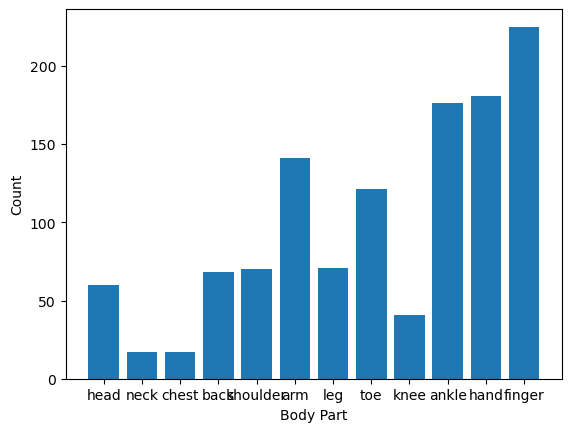

In [359]:
fig, ax = plt.subplots()
ax.bar(total_counts.keys(), total_counts.values())
ax.set_xlabel('Body Part')
ax.set_ylabel('Count')

# d) Age and Gender

#### 1. Identify patterns that indicate age and gender in the narratives. 

In [360]:
age_pattern = r'(\d{1,3})\s*(?:Y(?:EARS?)?|M(?:ONTHS?)?)?\s*(?:O(?:LD)?)?\s*(M(?:ALE)?|F(?:EMALE)?)?'
gender_pattern = r'(M(?:ALE)?|F(?:EMALE)?)'

#### 2. Extract age and gender details from the narratives. Convert age given in months to years for consistency.
#### 3. Handle entries with no age or gender details appropriately.

In [361]:
def age_gender(narrative):
    age_pattern = r'(\d{1,3})\s*(?:Y(?:EARS?)?|M(?:ONTHS?)?)?\s*(?:O(?:LD)?)?\s*(M(?:ALE)?|F(?:EMALE)?)?'
    gender_pattern = r'(M(?:ALE)?|F(?:EMALE)?)'

    age_match = re.search(age_pattern, narrative, re.IGNORECASE)
    gender_match = re.search(gender_pattern, narrative, re.IGNORECASE)

    age = int(age_match.group(1)) if age_match and age_match.group(1) else None
    unit = age_match.group(2) if age_match and age_match.group(2) else None
    gender = gender_match.group(1) if gender_match and gender_match.group(1) else None

    if unit in ('MO', 'M'):
        age /= 12

    return age, gender

In [363]:
for i in emergency.index:
    age, gender = age_gender(emergency.loc[i].iloc[0])
    print(f"Age: {age}, Gender: {gender}")

Age: 75, Gender: F
Age: 8, Gender: F
Age: 0.75, Gender: M
Age: None, Gender: F
Age: 0.75, Gender: M
Age: 12, Gender: F
Age: 50, Gender: FEMALE
Age: 21, Gender: M
Age: 3, Gender: None
Age: 77, Gender: MALE
Age: 75, Gender: F
Age: 28, Gender: F
Age: 45, Gender: F
Age: 80, Gender: F
Age: 5, Gender: M
Age: 21, Gender: F
Age: 2, Gender: F
Age: 7, Gender: F
Age: 2.8333333333333335, Gender: M
Age: 30, Gender: F
Age: 20, Gender: M
Age: 5.5, Gender: M
Age: 2, Gender: M
Age: 17, Gender: F
Age: 4.25, Gender: M
Age: 6.666666666666667, Gender: M
Age: 15, Gender: MALE
Age: 1.0, Gender: M
Age: 1.5833333333333333, Gender: M
Age: 43, Gender: F
Age: 1.6666666666666667, Gender: F
Age: 27, Gender: F
Age: 3.8333333333333335, Gender: M
Age: 4.583333333333333, Gender: F
Age: 10, Gender: FEMALE
Age: 69, Gender: F
Age: 2, Gender: M
Age: None, Gender: F
Age: 87, Gender: F
Age: 70, Gender: F
Age: None, Gender: F
Age: 1.25, Gender: M
Age: 1, Gender: M
Age: 18, Gender: M
Age: None, Gender: None
Age: 6, Gender: MAL

#### 4. Visualize the number of injuries across different ages or age groups, disaggregated by gender. Define whether age is treated as a continuous variable or binned into age groups.

In [364]:
emergency['age'] = None 
emergency['gender'] = None

for i in emergency.index:
    age, gender = age_gender(emergency.loc[i].iloc[0])
    
    if gender is not None:
        gender = gender.lower()
        if gender.startswith('f'):
            gender = 'Female'
        elif gender.startswith('m'):
            gender = 'Male'
    
    emergency.at[i, 'age'] = age
    emergency.at[i, 'gender'] = gender
    
emergency['age'] = pd.to_numeric(emergency['age'], errors='coerce')

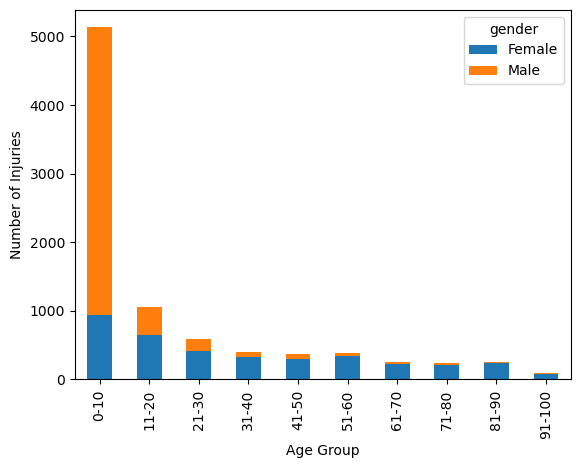

In [365]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
emergency['age_group'] = pd.cut(emergency['age'], bins=bins, labels=labels, right=False)
age_gender_counts = emergency.groupby(['age_group', 'gender']).size().unstack()
age_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Number of Injuries')
plt.show()